In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import tensorflow as tf
import os
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

session = tf.InteractiveSession(config=config)
session.run(tf.global_variables_initializer())
from hyperparams import Hyperparams as H
import numpy as np
import tensorflow as tf
from utils import np_utils, sk_utils
import imageio
import paths
from model import Model
from pose import model as PM


In [ ]:
from model_service import DanceModelService
dms = DanceModelService.get_instance()
dms.load_weights(iter_no=35200, iter_or_best='iter', dir_name='load')

In [ ]:
from data_loader import DataLoader
data_loader = DataLoader(300)
num_batches_train = data_loader.get_num_batches('train', H.train_batch_size)
x_batch, tuples = data_loader.get_train_sequence_batch(1, 0)
x_batch = x_batch[:, :, :17]
labels = x_batch[:, 1:, :]

In [ ]:
x_batch.shape
x_batch_60 = [x_batch[0, i:i + 60] for i in
                      range(0, 300-60 + 1, 60)]
x_batch_60 = np.stack(x_batch_60, axis=0)

x_batch_60.shape



# pred_ops = dms.predict(x_batch)
# predictions = pred_ops
# predictions.shape

In [ ]:
mkdir -p ../results/predictions/

In [ ]:
pred_ops = dms.predict(x_batch_60)
predictions = pred_ops
predictions.shape

In [ ]:
lst = [predictions[i] for i in range(5)]

x_predictions = np.concatenate(lst, axis=0)
x_predictions = np.expand_dims(x_predictions, axis=0)

x_predictions.shape

In [ ]:
len(lst)

In [ ]:
x_pred = dms.decode(predictions_test)
x_pred.shape

In [ ]:
imgs_true = sk_utils.get_skeleton_images(x_batch[0], title_prefix='p')

imgs_pred = sk_utils.get_skeleton_images(x_predictions[0], title_prefix='p')

imgs_concat = [np.concatenate((imgs_true[i], imgs_pred[i]), axis=1) for i in range(len(imgs_pred))]


In [ ]:
imgs_concat[0].shape

In [ ]:
# imgs = sk_utils.get_skeleton_images(x_reshape[22], title_prefix='p')
writer = imageio.get_writer('../results/predictions/op_sequential_comparison_concatenate.mp4', fps=30)
for i, im in enumerate(imgs_concat):
    writer.append_data(im)
    if i % 10 == 0:
        print 'done with %d frames' % i
writer.close()

In [ ]:
writer = imageio.get_writer('../results/predictions/op_sequential_comparison_indian_true.mp4', fps=30)
for i, im in enumerate(imgs_true):
    writer.append_data(im)
    if i % 10 == 0:
        print 'done with %d frames' % i
writer.close()

In [ ]:
for kk in range(5):
    imgs = sk_utils.get_skeleton_images(predictions[kk], title_prefix='p')
    writer = imageio.get_writer('../results/predictions/op15_60_individual{}.gif'.format(kk), fps=10)
    for i, im in enumerate(imgs):
        writer.append_data(im)
    print 'done with %d video' % kk
    writer.close()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x_gen = dms.decode(p_new)
x_gen.shape

In [ ]:
mkdir -p  '../rehttp://localhost:8080/notebooks/PoseSeqGAN_AE/visualizations.ipynb#sults/pred/'

In [ ]:
for kk in range(16):
    imgs = sk_utils.get_skeleton_images(x_gen[kk], title_prefix='p')
    writer = imageio.get_writer('../results/gen/inter/martial_salsa2/gen_{}.mp4'.format(kk), fps=30)
    for i, im in enumerate(imgs):
        writer.append_data(im)
    print 'done with %d video' % kk
    writer.close()

# Gaussian Fitting



In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import tensorflow as tf
import os
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

session = tf.InteractiveSession(config=config)
session.run(tf.global_variables_initializer())
from hyperparams import Hyperparams as H
import numpy as np
import tensorflow as tf
from utils import np_utils, sk_utils
import imageio
import paths
from model import Model
from pose import model as PM

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xa

/home/babu/.local/lib/python2.7/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


Instructions for updating:
keep_dims is deprecated, use keepdims instead


[src: tf_logging.py: 125] WARNING: warning(): From pose/model_componets.py:36: calling norm (from tensorflow.python.ops.linalg_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
keep_dims is deprecated, use keepdims instead


[src: tf_logging.py: 125] WARNING: warning(): From pose/commons/tf_transform.py:20: calling reduce_sum (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [3]:
from model_service import DanceModelService
dms = DanceModelService.get_instance()
dms.load_weights(iter_no=35200, iter_or_best='iter', dir_name='load')

visualizer_training.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/babu/.local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/babu/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/babu/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/home/babu/.local/lib/python2.7/site-packages/tornado

INFO:tensorflow:Summary name L1_x_x^^ is illegal; using L1_x_x__ instead.


[src: tf_logging.py: 115] INFO: info(): Summary name L1_x_x^^ is illegal; using L1_x_x__ instead.
[src: model.py:  43] INFO: build(): Defined Summaries
[src: model.py:  52] INFO: build(): encoder params:

[src: model.py:  54] INFO: build(): dance_rep/encoder/bidirectional_rnn/fw/gru_cell/gates/kernel:0
[src: model.py:  54] INFO: build(): dance_rep/encoder/bidirectional_rnn/fw/gru_cell/gates/bias:0
[src: model.py:  54] INFO: build(): dance_rep/encoder/bidirectional_rnn/fw/gru_cell/candidate/kernel:0
[src: model.py:  54] INFO: build(): dance_rep/encoder/bidirectional_rnn/fw/gru_cell/candidate/bias:0
[src: model.py:  54] INFO: build(): dance_rep/encoder/bidirectional_rnn/bw/gru_cell/gates/kernel:0
[src: model.py:  54] INFO: build(): dance_rep/encoder/bidirectional_rnn/bw/gru_cell/gates/bias:0
[src: model.py:  54] INFO: build(): dance_rep/encoder/bidirectional_rnn/bw/gru_cell/candidate/kernel:0
[src: model.py:  54] INFO: build(): dance_rep/encoder/bidirectional_rnn/bw/gru_cell/candidate/bi

<tf.Variable 'Encoder_net/l_arm_ft/weights:0' shape=(12, 32) dtype=float32_ref>
<tf.Variable 'Encoder_net/l_arm_ft/biases:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'Encoder_net/r_arm_ft/weights:0' shape=(12, 32) dtype=float32_ref>
<tf.Variable 'Encoder_net/r_arm_ft/biases:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'Encoder_net/r_leg_ft/weights:0' shape=(12, 32) dtype=float32_ref>
<tf.Variable 'Encoder_net/r_leg_ft/biases:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'Encoder_net/l_leg_ft/weights:0' shape=(12, 32) dtype=float32_ref>
<tf.Variable 'Encoder_net/l_leg_ft/biases:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'Encoder_net/trunk_ft/weights:0' shape=(9, 32) dtype=float32_ref>
<tf.Variable 'Encoder_net/trunk_ft/biases:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'Encoder_net/trunk_l_arm_ft/weights:0' shape=(64, 64) dtype=float32_ref>
<tf.Variable 'Encoder_net/trunk_l_arm_ft/biases:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'Encoder_net/trunk_r_arm_ft/weights:0' s

trying to load iter weights...
INFO:tensorflow:Restoring parameters from ../../ent44/weights/encoder_float32-2958501


[src: tf_logging.py: 115] INFO: info(): Restoring parameters from ../../ent44/weights/encoder_float32-2958501


INFO:tensorflow:Restoring parameters from ../../ent44/weights/decoder_float32-2958501


[src: tf_logging.py: 115] INFO: info(): Restoring parameters from ../../ent44/weights/decoder_float32-2958501
[src: model_service.py:  74] INFO: __init__(): All variable initialized...

[src: model_service.py:  84] INFO: load_weights(): Trying to load iter weights...
[src: model_service.py:  86] INFO: load_weights(): Loading encoder weights all: 35200...


done bitches  __|__ 
INFO:tensorflow:Restoring parameters from ../weights_x_cyclic/all/encoder_iter-35200


[src: tf_logging.py: 115] INFO: info(): Restoring parameters from ../weights_x_cyclic/all/encoder_iter-35200


NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ../weights_x_cyclic/all/encoder_iter-35200
	 [[Node: save_2/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save_2/Const_0_0, save_2/RestoreV2/tensor_names, save_2/RestoreV2/shape_and_slices)]]

Caused by op u'save_2/RestoreV2', defined at:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/babu/.local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/babu/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/babu/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/home/babu/.local/lib/python2.7/site-packages/tornado/ioloop.py", line 1073, in start
    handler_func(fd_obj, events)
  File "/home/babu/.local/lib/python2.7/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/babu/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/babu/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/babu/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/babu/.local/lib/python2.7/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/babu/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/babu/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/babu/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/babu/.local/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/babu/.local/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/babu/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2714, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/babu/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2818, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/babu/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2878, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-d98e72072d8b>", line 2, in <module>
    dms = DanceModelService.get_instance()
  File "model_service.py", line 25, in get_instance
    cls.__instance = cls(load_iter_no, iter_or_best, max_to_keep)
  File "model_service.py", line 54, in __init__
    self.loader[network] = tf.train.Saver(self.model.params[network])
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 1284, in __init__
    self.build()
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 1296, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 1333, in _build
    build_save=build_save, build_restore=build_restore)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 781, in _build_internal
    restore_sequentially, reshape)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 400, in _AddRestoreOps
    restore_sequentially)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 832, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gen_io_ops.py", line 1463, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 3414, in create_op
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

NotFoundError (see above for traceback): Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ../weights_x_cyclic/all/encoder_iter-35200
	 [[Node: save_2/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save_2/Const_0_0, save_2/RestoreV2/tensor_names, save_2/RestoreV2/shape_and_slices)]]


In [4]:
from data_loader import DataLoader
data_loader = DataLoader(60)
num_batches_train = data_loader.get_num_batches('train', H.train_batch_size)
x_batch, tuples = data_loader.get_train_sequence_batch(1000, 0)
x_batch = x_batch[:, :, :17]
labels = x_batch[:, 1:, :]

[src: cmu.py: 131] INFO: __populate_data(): Populating CMU Data


../../../datasets/cmu/selected/005/005_01_sk_fit.mat
../../../datasets/cmu/selected/005/005_02_sk_fit.mat
../../../datasets/cmu/selected/005/005_03_sk_fit.mat
../../../datasets/cmu/selected/005/005_04_sk_fit.mat
../../../datasets/cmu/selected/005/005_05_sk_fit.mat
../../../datasets/cmu/selected/005/005_06_sk_fit.mat
../../../datasets/cmu/selected/005/005_07_sk_fit.mat
../../../datasets/cmu/selected/005/005_08_sk_fit.mat
../../../datasets/cmu/selected/005/005_09_sk_fit.mat
../../../datasets/cmu/selected/005/005_10_sk_fit.mat
../../../datasets/cmu/selected/005/005_11_sk_fit.mat
../../../datasets/cmu/selected/005/005_12_sk_fit.mat
../../../datasets/cmu/selected/005/005_13_sk_fit.mat
../../../datasets/cmu/selected/005/005_14_sk_fit.mat
../../../datasets/cmu/selected/005/005_15_sk_fit.mat
../../../datasets/cmu/selected/005/005_16_sk_fit.mat
../../../datasets/cmu/selected/005/005_17_sk_fit.mat
../../../datasets/cmu/selected/005/005_18_sk_fit.mat
../../../datasets/cmu/selected/005/005_19_sk_f

../../../datasets/cmu/selected/093/093_03_sk_fit.mat
../../../datasets/cmu/selected/093/093_04_sk_fit.mat
../../../datasets/cmu/selected/093/093_05_sk_fit.mat
../../../datasets/cmu/selected/093/093_06_sk_fit.mat
../../../datasets/cmu/selected/093/093_07_sk_fit.mat
../../../datasets/cmu/selected/093/093_08_sk_fit.mat
../../../datasets/cmu/selected/094/094_01_sk_fit.mat
../../../datasets/cmu/selected/094/094_02_sk_fit.mat
../../../datasets/cmu/selected/094/094_03_sk_fit.mat
../../../datasets/cmu/selected/094/094_04_sk_fit.mat
../../../datasets/cmu/selected/094/094_05_sk_fit.mat
../../../datasets/cmu/selected/094/094_06_sk_fit.mat
../../../datasets/cmu/selected/094/094_07_sk_fit.mat
../../../datasets/cmu/selected/094/094_08_sk_fit.mat
../../../datasets/cmu/selected/094/094_09_sk_fit.mat
../../../datasets/cmu/selected/094/094_10_sk_fit.mat
../../../datasets/cmu/selected/094/094_11_sk_fit.mat
../../../datasets/cmu/selected/094/094_12_sk_fit.mat
../../../datasets/cmu/selected/094/094_13_sk_f

[src: cmu.py: 137] INFO: __populate_data(): CMU Data populated

[src: datasets.py:  37] INFO: __init__(): Dataset initialized...


../../../datasets/cmu/selected/135/135_05_sk_fit.mat
../../../datasets/cmu/selected/135/135_06_sk_fit.mat
../../../datasets/cmu/selected/135/135_07_sk_fit.mat
../../../datasets/cmu/selected/135/135_08_sk_fit.mat
../../../datasets/cmu/selected/135/135_09_sk_fit.mat
../../../datasets/cmu/selected/135/135_10_sk_fit.mat
../../../datasets/cmu/selected/135/135_11_sk_fit.mat
../../../datasets/cmu/selected/141/141_12_sk_fit.mat
../../../datasets/cmu/selected/143/143_34_sk_fit.mat
../../../datasets/cmu/selected/143/143_35_sk_fit.mat


In [5]:
print x_batch.shape

(1000, 60, 17, 3)


In [6]:
pred_ops = dms.predict(x_batch)
predictions = pred_ops
predictions.shape

(1000, 256)

In [13]:
mean = np.mean(predictions, axis=0)
std = np.std(predictions,axis=0)

print mean.shape
print std.shape

# x_pred = dms.decode(predictions)
# x_pred.shape

# imgs = sk_utils.get_skeleton_images(x_pred[0], title_prefix='p')
# len(imgs)
print('minimum vaue of mean ', min(mean))
print('minimum value of std ', min(std))
print('maximum value of mean', max(mean))
print('maximum value of std', max(std))


(256,)
(256,)
('minimum vaue of mean ', -0.39696729)
('minimum value of std ', 0.022942964)
('maximum value of mean', 0.40537712)
('maximum value of std', 0.07443475)


In [8]:
sample_1 = mean+(2*std)
sample_2 = mean-(2*std)
sample_1 = np.reshape(sample_1 , (1,256))
sample_2 = np.reshape(sample_2 , (1,256))
map_d = 120


In [9]:
a = np.linspace(0,1, map_d)
a = np.reshape(a, (map_d,1))


In [10]:
vertical = a*sample_1[:,:128] + (1-a)*sample_2[:,:128]

assert (vertical[0] == sample_2[0,:128]).all()

In [11]:
horizontal = a*sample_1[:,128:] + (1-a)*sample_2[:,128:]

assert (horizontal[0] == sample_2[0,128:]).all()

In [12]:
print(vertical.shape)
print horizontal.shape

(120, 128)
(120, 128)


In [15]:
grid = np.empty((map_d,map_d,256))

In [16]:
for i in range(map_d):
    for j in range(map_d):
        grid[i,j] = np.concatenate((vertical[i], horizontal[j]))

In [17]:
grid_flat = np.reshape(grid, (-1,256))

print grid.shape
print grid_flat.shape

(120, 120, 256)
(14400, 256)


In [18]:
pred_ops = dms.decode(grid_flat)
predictions = pred_ops
print(predictions.shape)

(14400, 60, 17, 3)


In [19]:
predictions = np.mean(predictions, axis=-1)
predictions = np.mean(predictions, axis=-1)

print predictions.shape

(14400, 60)


In [20]:
velocity = predictions[:,1:] - predictions[:,:-1]
speed = np.absolute(velocity)

print(speed.shape)

(14400, 59)


In [14]:
speed  = np.mean(speed, axis=-1)

speed = np.reshape(speed, (map_d,map_d))

print(speed.shape)



NameError: name 'speed' is not defined

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline  

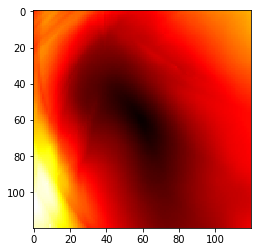

In [38]:
plt.imshow(speed, cmap='hot', interpolation='nearest')
plt.savefig("test.svg", format="svg")
plt.show()

In [ ]:
a = np.argmax(speed)

c  = np.unravel_index(a, speed.shape)

print c


In [ ]:
for i in range(-4,5):
    l = mean + i*std
    l = np.reshape(l, (1,256))
    x_pred = dms.decode(l)
    imgs = sk_utils.get_skeleton_images(x_pred[0], title_prefix='p')
    writer = imageio.get_writer('../normal/predictions/op_{}.mp4'.format(i), fps=30)
    for j, im in enumerate(imgs):
        writer.append_data(im)
        if j % 10 == 0:
            print 'done with %d frames' % j
    writer.close()

    

In [ ]:
# fig = plt.figure(figsize=(10, 12))
# fig.savefig('../yolo.png')

# DATA GT comparison


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
x_zds_real_seq1 = dms.decode(zds_real_seq2)
x_zds_real_seq1.shape

In [ ]:
imgs = sk_utils.get_skeleton_images(x_zds_real_seq1[77], title_prefix='p')
# writer = imageio.get_writer('../results/gen/inter/martial_salsa/gt-1.mp4', fps=30)
# for i, im in enumerate(imgs):
#     writer.append_data(im)
# writer.close()

In [ ]:
from matplotlib.gridspec import GridSpec
from pose.commons.vis_util import Ax3DPose
def create_skeleton_grid(skkk_batch, nrows, ncols):
    assert sk_batch.shape[0] <= nrows * ncols, 'Number skeletons exceeds the grid capacity'
    fig = plt.figure(figsize=(ncols * 2, nrows * 2))
    spec = GridSpec(nrows, ncols, figure=fig, hspace=0.0, wspace=0.0)
    axes = []
0    for i in range(nrows):
        for j in range(ncols):
            axes.append(Ax3DPose(fig.add_subplot(spec[i, j], projection='3d')))
    for k in range(len(sk_batch)):
        axes[k].update(sk_batch[k])
    return fig

In [ ]:
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

import tensorflow as tf
from termcolor import colored
import random
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import io
limb_parents = [0, 0, 1, 2, 3, 1, 5, 6, 1, 0, 9, 10, 11, 0, 13, 14, 15]
import cv2
def get_figure():           
    fig = plt.figure(frameon=False, figsize=(8, 8))
    fig.clf()
    return fig


def draw_limbs_3d_plt(joints_3d, ax, limb_parents=limb_parents, z_flip = True):
    for i in range(joints_3d.shape[0]):
        x_pair = [joints_3d[i, 0], joints_3d[limb_parents[i], 0]]
        y_pair = [joints_3d[i, 1], joints_3d[limb_parents[i], 1]]
        z_pair = [joints_3d[i, 2], joints_3d[limb_parents[i], 2]]
        ax.plot(z_pair, x_pair, y_pair, linewidth=3, antialiased=True)
        
def get_ax(joints_3d, fig, az=0, ele=10, subplot='111'):
    x,y,z  =subplot
    ax = fig.add_subplot(x,y,z, projection='3d')

    lim = np.max(np.abs(joints_3d))
    ax.view_init(azim=az, elev=ele)
    
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-lim, lim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    return ax
        
def get_skeleton_plot(joints_3d, ax, limb_parents=limb_parents, title="", z_flip=True):
#     fig = plt.figure(frameon=False, figsize=(7, 7))
    draw_limbs_3d_plt(joints_3d, ax, limb_parents, z_flip)
    plt.title(title)


def plot_skeleton(joints_3d, ax, limb_parents=limb_parents, title="", z_flip=True):
    get_skeleton_plot(joints_3d, ax, limb_parents, title, z_flip=z_flip)


def plot_skeleton_and_scatter(ske,ax, mono=False):
    plot_skeleton(ske,ax,z_flip=mono)



def plot_skeleton_and_scatter_mask(ske, mask, ax, mono=False):
    plot_skeleton(ske,ax,z_flip=mono)

def gen_plot(fig, x_recon, inputs, sequence, random_idx, name, switch):
    ax = get_ax(x_recon, fig, subplot= (1,1,1), az=90)
    plot_skeleton_and_scatter(x_recon, ax)